In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='pastel')
sns_context = sns.set_context('paper', font_scale=1.25)
sns.set_palette('deep')
sns_context

In [58]:
df = pd.read_csv("DATA/train.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386491 entries, 0 to 386490
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       386491 non-null  int64  
 1   YEAR                             386491 non-null  int64  
 2   MONTH                            386491 non-null  int64  
 3   DAYOFMONTH                       386491 non-null  int64  
 4   DAYOFWEEK                        386491 non-null  int64  
 5   FLIGHTDATE                       386491 non-null  object 
 6   REPORTING_AIRLINE                386491 non-null  object 
 7   FLIGHT_NUMBER_REPORTING_AIRLINE  386491 non-null  int64  
 8   ORIGIN                           386491 non-null  object 
 9   DEST                             386491 non-null  object 
 10  CRSDEPTIME                       386491 non-null  int64  
 11  DEPTIME                          386491 non-null  float64
 12  DE

In [60]:
df.columns = df.columns.str.upper()

In [61]:
df['FLIGHTDATE'] = pd.to_datetime(df['FLIGHTDATE'])

In [62]:
df['CRSDEPTIME'] = df['CRSDEPTIME'].astype(str)
df['CRSDEPTIME'] = df['CRSDEPTIME'].str.zfill(4)
df['DEPHOUR'] = df['CRSDEPTIME'].str[:-2]
df['DEPMINUTE'] = df['CRSDEPTIME'].str[-2:]
df['DEPHOUR'] = df['DEPHOUR'].str.zfill(2)
df['DEPMINUTE'] = df['DEPMINUTE'].str.zfill(2)

In [63]:
flight_counts = df.groupby(['ORIGIN', 'MONTH', 'DAYOFMONTH', 'DEPHOUR']).size().reset_index(name='FLIGHTSSAMETIME')

In [66]:
df = df.merge(flight_counts, on=['ORIGIN', 'MONTH', 'DAYOFMONTH', 'DEPHOUR'], how='left')

In [67]:
df['FLIGHTSSAMETIME'] = df['FLIGHTSSAMETIME'].fillna(0).astype(int)

In [68]:
cols = ['YEAR', 'MONTH', 'DAYOFMONTH', 'DAYOFWEEK', 'FLIGHTDATE',
       'REPORTING_AIRLINE', 'FLIGHT_NUMBER_REPORTING_AIRLINE',
       'ORIGIN', 'DEST', 'CRSDEPTIME', 'DEPTIME',
       'DEPDELAY', 'DEPDELAYMINUTES', 'DEPDEL15', 'DEPARTUREDELAYGROUPS',
       'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 'AIRTIME', 'DISTANCE',
       'DISTANCEGROUP', 'CARRIERDELAY', 'WEATHERDELAY', 'NASDELAY',
       'SECURITYDELAY',
        'DEPHOUR', 'DEPMINUTE',
       'FLIGHTSSAMETIME']
df = df[cols]

df['DELAY_BIN'] = None
df.loc[df['DEPDELAYMINUTES'] == 0, 'DELAY_BIN'] = "0"
df.loc[(df['DEPDELAYMINUTES'] > 0) & (df['DEPDELAYMINUTES'] < 15) , 'DELAY_BIN'] = "0-15"
df.loc[(df['DEPDELAYMINUTES'] > 15) & (df['DEPDELAYMINUTES'] < 45) , 'DELAY_BIN'] = "15-45"
df.loc[df['DEPDELAYMINUTES'] > 45 , 'DELAY_BIN'] = "45+"

In [69]:
df.isna().sum()

YEAR                                  0
MONTH                                 0
DAYOFMONTH                            0
DAYOFWEEK                             0
FLIGHTDATE                            0
REPORTING_AIRLINE                     0
FLIGHT_NUMBER_REPORTING_AIRLINE       0
ORIGIN                                0
DEST                                  0
CRSDEPTIME                            0
DEPTIME                               0
DEPDELAY                              0
DEPDELAYMINUTES                       0
DEPDEL15                              0
DEPARTUREDELAYGROUPS                  0
CRSELAPSEDTIME                        0
ACTUALELAPSEDTIME                  1290
AIRTIME                            1290
DISTANCE                              0
DISTANCEGROUP                         0
CARRIERDELAY                          0
WEATHERDELAY                          0
NASDELAY                              0
SECURITYDELAY                         0
DEPHOUR                               0


<Axes: title={'center': 'Distribucion de DEPDELAYMINUTES < 100 y > 1'}, ylabel='Frequency'>

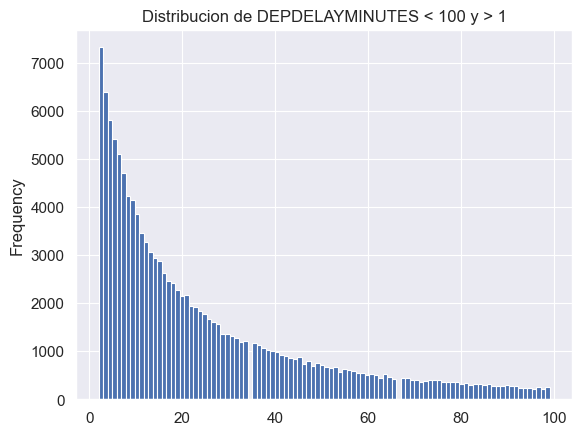

In [70]:
df.query("DEPDELAYMINUTES < 100 & DEPDELAYMINUTES > 1")['DEPDELAYMINUTES'].plot(kind='hist', bins=100, title='Distribucion de DEPDELAYMINUTES < 100 y > 1')

In [71]:
def get_stats(x):
    return {'min': x.min(),
            'max': x.max(),
            'mean': x.mean(),
            'std': x.std(),
            'count':x.count()}

stats = df['DEPDELAYMINUTES'].groupby(df['DEPHOUR']).apply(get_stats).unstack()
stats = stats.reset_index()
stats = stats.sort_values('DEPHOUR')
stats

,DEPHOUR,min,max,mean,std,count
0,00,0.0,861.0,20.421793,79.744097,569.0
1,01,0.0,1100.0,29.495283,110.053950,212.0
2,02,0.0,121.0,11.395062,24.498306,81.0
3,03,0.0,57.0,20.263158,16.397297,19.0
4,04,0.0,40.0,2.565217,8.511095,23.0
5,05,0.0,1737.0,7.744276,49.170736,11094.0
6,06,0.0,2275.0,8.523466,50.293716,28552.0
7,07,0.0,1606.0,9.492428,46.557902,25157.0
8,08,0.0,1769.0,9.344527,37.774135,26265.0
9,09,0.0,1793.0,10.639868,43.823865,21506.0


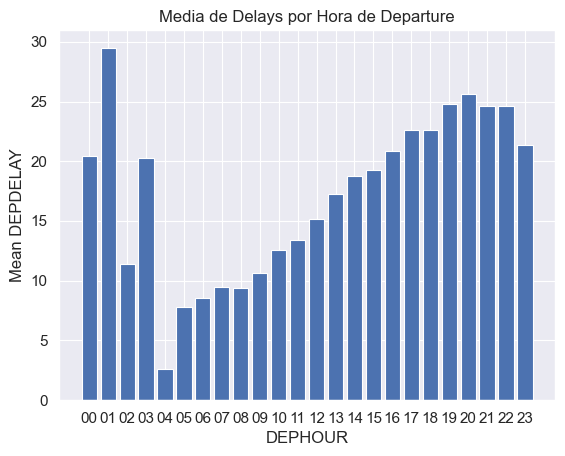

In [72]:
plt.bar(stats['DEPHOUR'], stats['mean'])
plt.xlabel('DEPHOUR')
plt.ylabel('Mean DEPDELAY')
plt.title('Media de Delays por Hora de Departure')
plt.show() # Desde las horas 23 a 04, hay un count muy bajo.

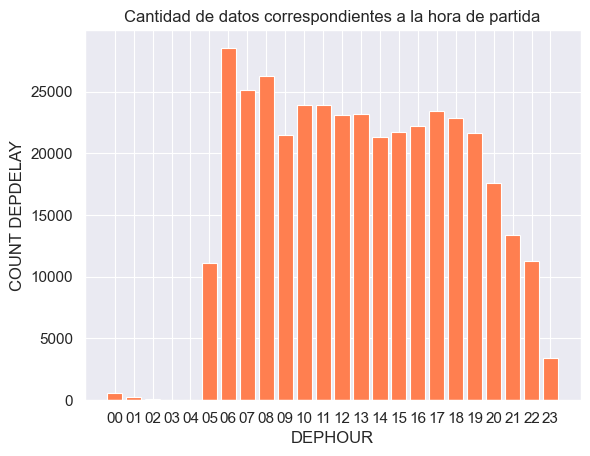

In [73]:
bars = plt.bar(stats['DEPHOUR'], stats['count'], color='coral')
plt.xlabel('DEPHOUR')
plt.ylabel('COUNT DEPDELAY')
plt.title('Cantidad de datos correspondientes a la hora de partida')
plt.show()

In [74]:
stats_airlines = df['DEPDELAYMINUTES'].groupby(df['REPORTING_AIRLINE']).apply(get_stats).unstack()
stats_airlines = stats_airlines.sort_values('count')
stats_airlines = stats_airlines.reset_index()
stats_airlines = stats_airlines.sort_values('mean', ascending=False)

<Axes: title={'center': 'Comparativo de cantidad de tipos de delay por aerolinea'}, xlabel='REPORTING_AIRLINE'>

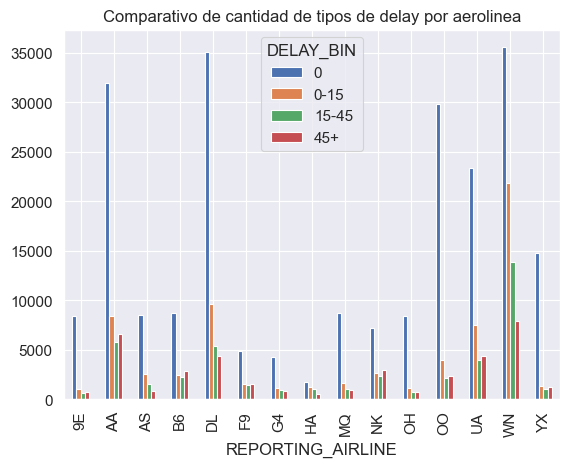

In [75]:
df['DELAY_BIN'].groupby(df['REPORTING_AIRLINE']).value_counts().unstack().plot(kind='bar', title='Comparativo de cantidad de tipos de delay por aerolinea')

<Axes: title={'center': 'Distribucion de tipos de delay'}>

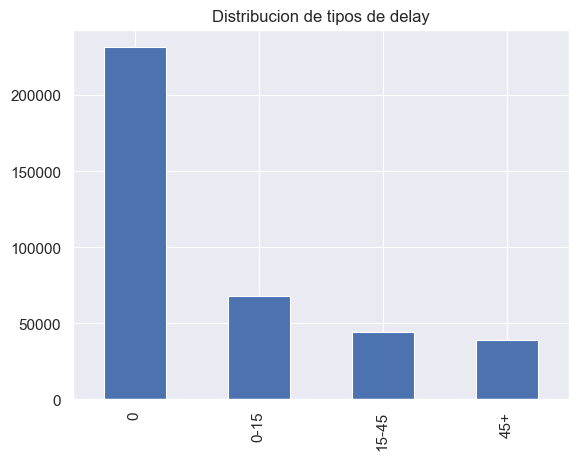

In [76]:
df['DELAY_BIN'].value_counts().plot(kind='bar', title='Distribucion de tipos de delay')

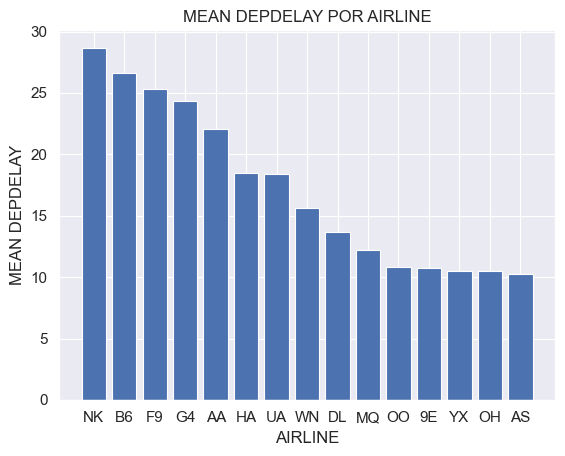

In [77]:
bars = plt.bar(stats_airlines['REPORTING_AIRLINE'], stats_airlines['mean'])
plt.xlabel('AIRLINE')
plt.ylabel('MEAN DEPDELAY')
plt.title('MEAN DEPDELAY POR AIRLINE')
plt.show()

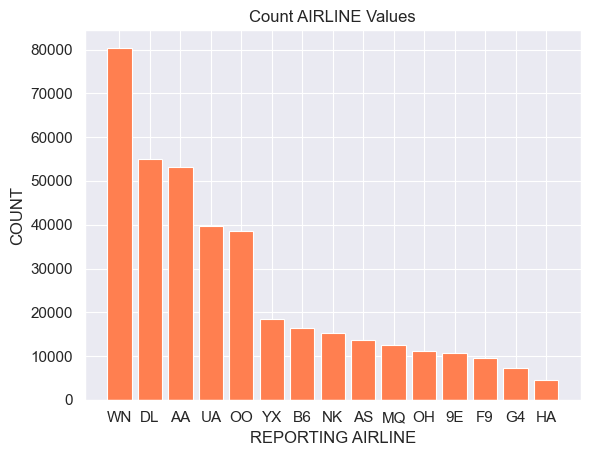

In [78]:
stats_airlines = stats_airlines.sort_values('count', ascending=False)
bars = plt.bar(stats_airlines['REPORTING_AIRLINE'], stats_airlines['count'], color='coral')
plt.xlabel('REPORTING AIRLINE')
plt.ylabel('COUNT')
plt.title('Count AIRLINE Values')
plt.show()

In [79]:
stats_airports = df['DEPDELAYMINUTES'].groupby(df['ORIGIN']).apply(get_stats).unstack()
stats_airports = stats_airports.sort_values('count', ascending=False)
stats_airports = stats_airports.reset_index()
stats_airports_30 = stats_airports[:30] # top 30 aeropuertos con mayor count en el dataset

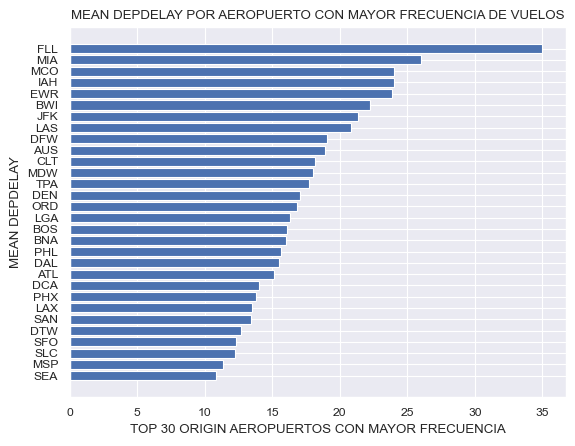

In [80]:
sns.set_context('paper')
stats_airports_30 = stats_airports_30.sort_values('mean', ascending=True)
bars = plt.barh(stats_airports_30['ORIGIN'], stats_airports_30['mean'])
plt.xlabel('TOP 30 ORIGIN AEROPUERTOS CON MAYOR FRECUENCIA')
plt.ylabel('MEAN DEPDELAY')
plt.title('MEAN DEPDELAY POR AEROPUERTO CON MAYOR FRECUENCIA DE VUELOS')
plt.show()

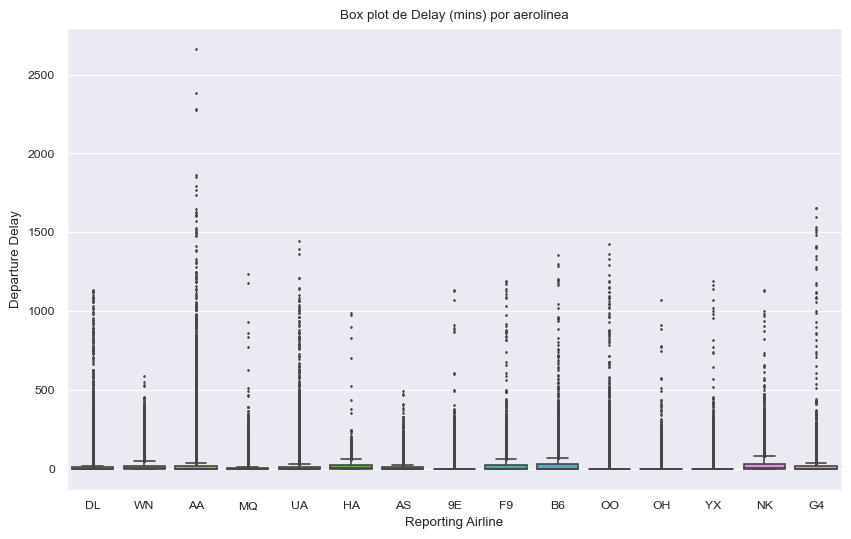

In [81]:
sns_context
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='REPORTING_AIRLINE', y='DEPDELAYMINUTES', flierprops={'markersize': 1})
plt.title('Box plot de Delay (mins) por aerolinea')
plt.xlabel('Reporting Airline')
plt.ylabel('Departure Delay')
plt.show()

In [82]:
flightsametime_stats =  df['DEPDEL15'].groupby(df['FLIGHTSSAMETIME']).apply(get_stats).unstack()

In [83]:
flightsametime_stats = flightsametime_stats.reset_index()

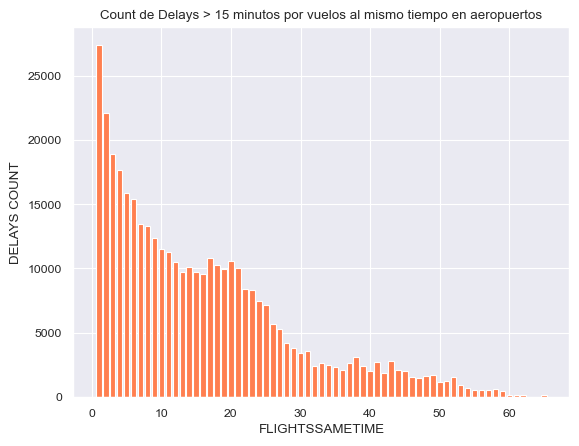

In [84]:
flightsametime_stats = flightsametime_stats.sort_values('count', ascending=False)
bars = plt.bar(flightsametime_stats['FLIGHTSSAMETIME'], flightsametime_stats['count'], color='coral')
plt.xlabel('FLIGHTSSAMETIME')
plt.ylabel('DELAYS COUNT')
plt.title('Count de Delays > 15 minutos por vuelos al mismo tiempo en aeropuertos')
plt.show()

In [85]:
df_num = df.select_dtypes(include=[np.number])
df_num.columns

Index(['YEAR', 'MONTH', 'DAYOFMONTH', 'DAYOFWEEK',
       'FLIGHT_NUMBER_REPORTING_AIRLINE', 'DEPTIME', 'DEPDELAY',
       'DEPDELAYMINUTES', 'DEPDEL15', 'DEPARTUREDELAYGROUPS', 'CRSELAPSEDTIME',
       'ACTUALELAPSEDTIME', 'AIRTIME', 'DISTANCE', 'DISTANCEGROUP',
       'CARRIERDELAY', 'WEATHERDELAY', 'NASDELAY', 'SECURITYDELAY',
       'FLIGHTSSAMETIME'],
      dtype='object')

In [86]:
num_cols = [
       'FLIGHT_NUMBER_REPORTING_AIRLINE', 'DEPTIME', 'DEPDELAY',
       'DEPDELAYMINUTES', 'DEPDEL15', 'DEPARTUREDELAYGROUPS', 'CRSELAPSEDTIME',
       'ACTUALELAPSEDTIME', 'AIRTIME', 'DISTANCE', 'DISTANCEGROUP',
       'CARRIERDELAY', 'WEATHERDELAY', 'NASDELAY', 'SECURITYDELAY',
       'FLIGHTSSAMETIME']
df_num = df_num[num_cols]

<Axes: >

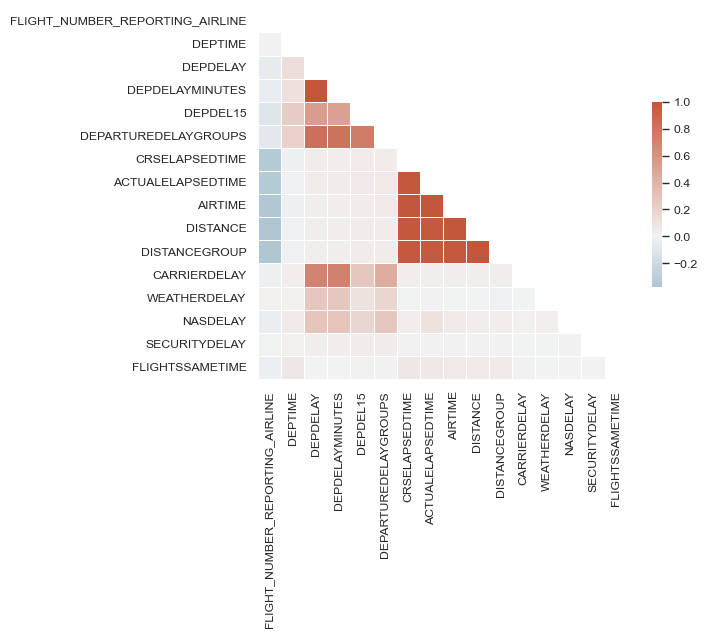

In [87]:
sns.set_theme(style='white')
sns.set_context('paper')
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [88]:
bin_width = 5

max_same_time = df['FLIGHTSSAMETIME'].max()
num_bins = int(np.ceil(max_same_time / bin_width))

bins = np.arange(0, (num_bins + 1) * bin_width, bin_width)

df['FLIGHTSSAMETIMEBIN'] = pd.cut(df['FLIGHTSSAMETIME'], bins=bins, labels=bins[:-1])

bin_proportions = df.groupby('FLIGHTSSAMETIMEBIN')['DEPDEL15'].mean().reset_index()

bin_proportions.columns = ['FLIGHTSSAMETIMEBIN', 'PROPORTIONSDELAYED']

print(bin_proportions)

   FLIGHTSSAMETIMEBIN  PROPORTIONSDELAYED
0                   0            0.196509
1                   5            0.233846
2                  10            0.249878
3                  15            0.242554
4                  20            0.228512
5                  25            0.216360
6                  30            0.244514
7                  35            0.233997
8                  40            0.215331
9                  45            0.190185
10                 50            0.201337
11                 55            0.235394
12                 60            0.206413


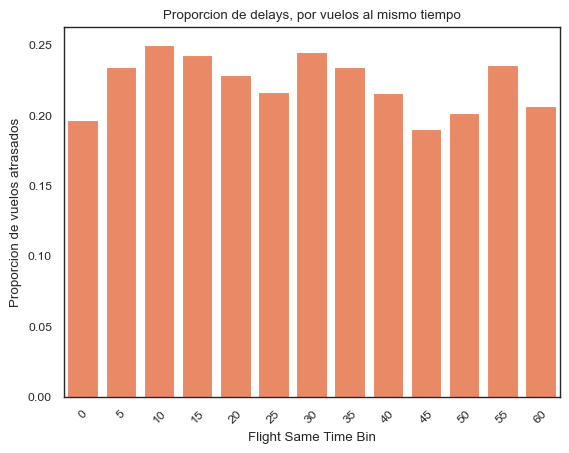

In [89]:
sns.barplot(data=bin_proportions, x='FLIGHTSSAMETIMEBIN', y='PROPORTIONSDELAYED', color='coral')
plt.xlabel("Flight Same Time Bin")
plt.ylabel("Proporcion de vuelos atrasados")
plt.title("Proporcion de delays, por vuelos al mismo tiempo")
plt.xticks(rotation=45)
plt.show()

In [90]:
stats_airports_30 = stats_airports_30.sort_values('mean', ascending=True)

In [91]:
stats_airports_30

,ORIGIN,min,max,mean,std,count
10,SEA,0.0,1133.0,10.851619,38.959667,8896.0
17,MSP,0.0,1069.0,11.369770,41.213231,6788.0
19,SLC,0.0,1162.0,12.240458,48.594268,6026.0
15,SFO,0.0,1473.0,12.278658,45.163394,7572.0
16,DTW,0.0,1121.0,12.682023,41.282077,7098.0
24,SAN,0.0,1191.0,13.391755,49.359370,5118.0
5,LAX,0.0,1207.0,13.478718,47.526102,10854.0
7,PHX,0.0,1241.0,13.826998,47.323333,10497.0
13,DCA,0.0,1068.0,13.993986,44.437449,7982.0
0,ATL,0.0,2281.0,15.110321,46.168206,19126.0


In [92]:
df.loc[df['ORIGIN'].isin(stats_airports_30['ORIGIN']), 'TOP30AIRPORTS'] = 1
df['TOP30AIRPORTS'].replace(np.NaN, 0, inplace=True)

In [93]:
df.loc[df['FLIGHTSSAMETIME'] > 80, 'FLIGHTSSAMETIME80'] = 1
df['FLIGHTSSAMETIME80'].replace(np.NaN, 0, inplace=True)

In [94]:
df

,YEAR,MONTH,DAYOFMONTH,DAYOFWEEK,FLIGHTDATE,REPORTING_AIRLINE,FLIGHT_NUMBER_REPORTING_AIRLINE,ORIGIN,DEST,CRSDEPTIME,...,WEATHERDELAY,NASDELAY,SECURITYDELAY,DEPHOUR,DEPMINUTE,FLIGHTSSAMETIME,DELAY_BIN,FLIGHTSSAMETIMEBIN,TOP30AIRPORTS,FLIGHTSSAMETIME80
0,2023,4,11,2,2023-04-11,DL,1525,TPA,ATL,1452,...,0.0,0.0,0.0,14,52,11,0,10,1.0,0.0
1,2023,4,12,3,2023-04-12,WN,2970,BUR,SMF,2015,...,0.0,0.0,0.0,20,15,4,0,0,0.0,0.0
2,2023,4,11,2,2023-04-11,AA,1478,CLT,IAH,1118,...,0.0,0.0,0.0,11,18,38,0-15,35,1.0,0.0
3,2023,4,27,4,2023-04-27,WN,2412,DCA,ATL,1600,...,0.0,0.0,0.0,16,00,19,0-15,15,1.0,0.0
4,2023,4,4,2,2023-04-04,WN,1084,DAL,AUS,0710,...,0.0,0.0,0.0,07,10,11,0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386486,2023,4,9,7,2023-04-09,AS,1212,PDX,SFO,0600,...,0.0,0.0,0.0,06,00,10,0,5,0.0,0.0
386487,2023,4,3,1,2023-04-03,AA,575,DFW,PNS,1635,...,0.0,0.0,0.0,16,35,42,0,40,1.0,0.0
386488,2023,4,29,6,2023-04-29,DL,1386,ATL,MIA,1506,...,0.0,16.0,0.0,15,06,36,0-15,35,1.0,0.0
386489,2023,4,17,1,2023-04-17,WN,536,OAK,MDW,0540,...,0.0,0.0,0.0,05,40,3,0,0,0.0,0.0


In [95]:
# Guardo cambios
df.to_csv("DATA/train.csv")